In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np

from dosipy.utils.viz import (set_colorblind, fig_config, set_axes_equal,
                              save_fig)
from helpers import generate_random_pc, pca

In [2]:
%config InlineBackend.figure_format = 'retina'

In [3]:
slope = (0.5, 0.)
np.random.seed(12346789)
pc, target = generate_random_pc(slope=slope)
xs = np.linspace(pc[:, 0].min(), pc[:, 0].max(), 33)
ys = np.linspace(pc[:, 1].min(), pc[:, 1].max(), 33)
X, Y = np.meshgrid(xs, ys)
Z = slope[0] * X + slope[1] * Y

eigenvalue, eigenvector = pca(np.c_[X.ravel(), Y.ravel(), Z.ravel()])
n = eigenvector[:, np.where(eigenvalue == eigenvalue.min())[0]].flatten()

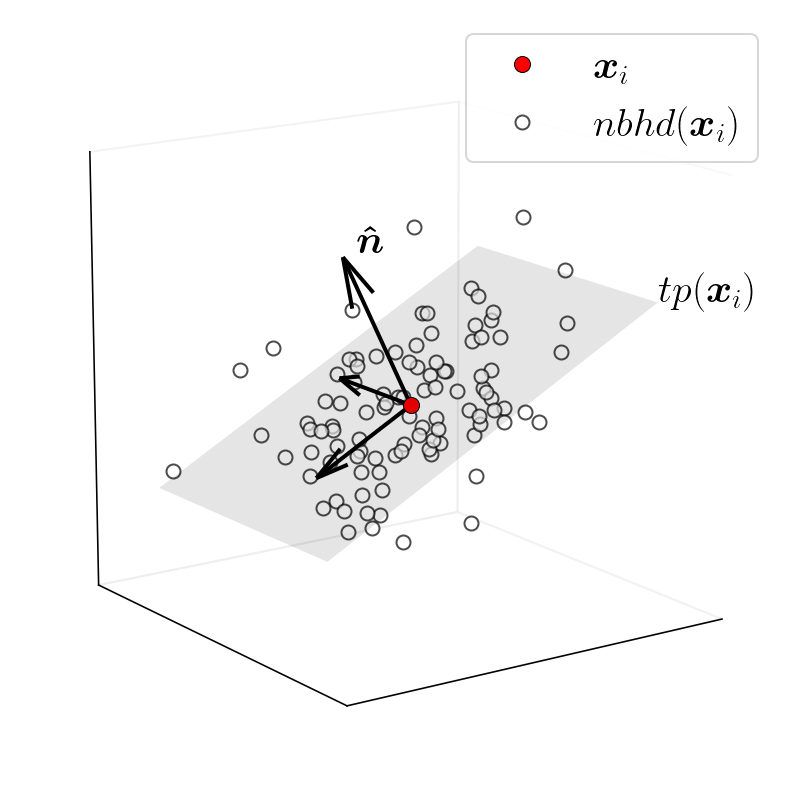

In [23]:
fig_config(latex=True, text_size=20, scaler=2, line_width=2)
fig = plt.figure()
ax = plt.axes(projection ='3d')

ax.plot(*target, 'ro', ms=8, zorder=5,
        label='$\\boldsymbol{x}_{i}$')
ax.plot(*pc.T, 'o', mfc='w', mew=1, ms=7, alpha=0.7,
        label='$nbhd(\\boldsymbol{x}_{i})$')
ax.plot_surface(X, Y, Z, color='k', ec='none', alpha=0.1)
ax.text(xs.max(), ys.min(), slope[0] * xs.max() + slope[1] * ys.min(),
        s='$tp(\\boldsymbol{x}_{i})$')
ax.quiver(*target, *n, normalize=True, color='k', length=5)
ax.text(n[0] - 1, n[1] + 0.5, n[2] + 3.5, s='$\\boldsymbol{\\hat n}$')
ax.quiver(*target, *eigenvector[:, 0], normalize=True, color='k', length=3.5)
ax.quiver(*target, *eigenvector[:, 1], normalize=True, color='k', length=3.5)
           
ax.set(xticks=[], yticks=[], zticks=[])
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.labelpad = -5
ax.yaxis.labelpad = -5
ax.zaxis.labelpad = -5
ax.view_init(15, -125)
ax.set_box_aspect([1, 1, 1])
ax = set_axes_equal(ax)
ax.legend()
fig.tight_layout()

# save figure
fname = os.path.join('figures', 'normals')
save_fig(fig, fname=fname)